<a href="https://colab.research.google.com/github/emiraydn21/Python/blob/main/Veri_Madenciligi_Proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wine Quality adlı sürekli veri setimizi UCI Machine Learning Repository'den indirelim;

In [180]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')


Wine Quality Veri Seti için gerekli kütüphanelerimiz;

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

Wine Quality adlı sürekli veri setimizi okuyalım;

In [181]:
# Nitelik sayımız fazla olduğu için print(df) şeklinde veri setini okursak düzensiz bir şekilde tablo oluşur onun için bu kodu kullanabiliriz;
df.head(1599)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Wine Quality adlı sürekli veri setimizin kalite puanlarını gösterelim ve Herbir kalite puanından kaçtane örnek olduğunu görelim.
Kalite puanlarını daire grafiğiyle gösterelim;

Kalite puanları: [5 6 7 4 8 3]
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


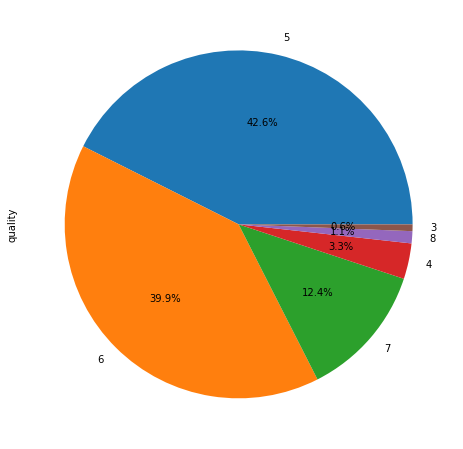

In [187]:
print("Kalite puanları:",df['quality'].unique())

print(df['quality'].value_counts())

plt.figure(1, figsize=(8,8))
df['quality'].value_counts().plot.pie(autopct="%1.1f%%")

Tanımlayıcı İstatistik(Descriptive Statistics) kullanarak veri kümesindeki özelliklerin kantitatif tanımlamasını, özetlemesini ve analizini yapalım;

In [188]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Wine Quality veri setimize Min-Max Normalizasyon işlemini uygulayalım; 

In [189]:
# Veri setindeki tüm özellikleri alın (exclude the quality column)
features = df.columns[:-1]

# Veri setindeki tüm özellikler için min-max normalizasyon işlemini uygulayın
for feature in features:
    df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

# Normalize edilmiş veri setini görüntüleyin
df.head(1599)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,5
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,5


Wine Quality veri setimize K en yakın komşu (K-Nearest Neighbours – KNN) yöntemini uygulayalım;

In [176]:
# Veri setini eğitim ve test veri setlerine ayırın
X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri standartlaştırın
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K en yakın komşu modelini oluşturun ve eğitin
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test veri setini kullanarak modeli test edin
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.546875


Wine Quality veri setinde karar ağacı yöntemini uygulayalım ;


In [175]:
# Veri setini eğitim ve test veri setlerine ayırın
X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar ağacı modelini oluşturun ve eğitin
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Test veri setini kullanarak modeli test edin
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.55625


Wine Quality veri setinde naive bayes yöntemini uygulayalım;

In [177]:
# Veri setini eğitim ve test veri setlerine ayırın
X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes modelini oluşturun ve eğitin
nb = GaussianNB()
nb.fit(X_train, y_train)

# Test veri setini kullanarak modeli test edin
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.55


Wine Quality veri setinde sınıf doğruluğunu confusion matrix kullanılarak  normalizasyonlu ve normalizasyon olmadan karşılaştırma yöntemini uygulayalım; (Equals %80 Eğitim %20 Test)


In [165]:
# Veri setini eğitim ve test veri setlerine ayırın
X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri standartlaştırın
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes modelini oluşturun ve eğitin (normalizasyon kullanarak)
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Test veri setini kullanarak modeli test edin (normalizasyon kullanarak)
y_pred = nb.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix (normalization):\n", conf_matrix)

# Naive Bayes modelini oluşturun ve eğitin (normalizasyon kullanmadan)
nb = GaussianNB()
nb.fit(X_train, y_train)

# Test veri setini kullanarak modeli test edin (normalizasyon kullanmadan)
y_pred = nb.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix (no normalization):\n",conf_matrix)

Confusion matrix (normalization):
 [[ 0  0  1  0  0  0]
 [ 1  2  6  1  0  0]
 [ 0  1 86 40  3  0]
 [ 0  4 37 65 24  2]
 [ 0  0  2 18 22  0]
 [ 0  0  0  1  4  0]]
Confusion matrix (no normalization):
 [[ 0  0  1  0  0  0]
 [ 1  2  6  1  0  0]
 [ 0  1 86 40  3  0]
 [ 0  4 37 65 24  2]
 [ 0  0  2 18 22  0]
 [ 0  0  0  1  4  0]]
